In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import pickle

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df=df.drop(["PassengerId","Name","Ticket","Embarked","Cabin"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [5]:
df=df.dropna()
replace_age = {"male":1 , "female":0}
df['Sex'].replace(replace_age,inplace=True)
df['Sex']=df['Sex'].astype(int)
df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    int64  
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 44.6 KB


C:\Users\karth\AppData\Local\Temp\ipykernel_10344\424194934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(replace_age,inplace=True)
C:\Users\karth\AppData\Local\Temp\ipykernel_10344\424194934.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace(replace_age,in

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

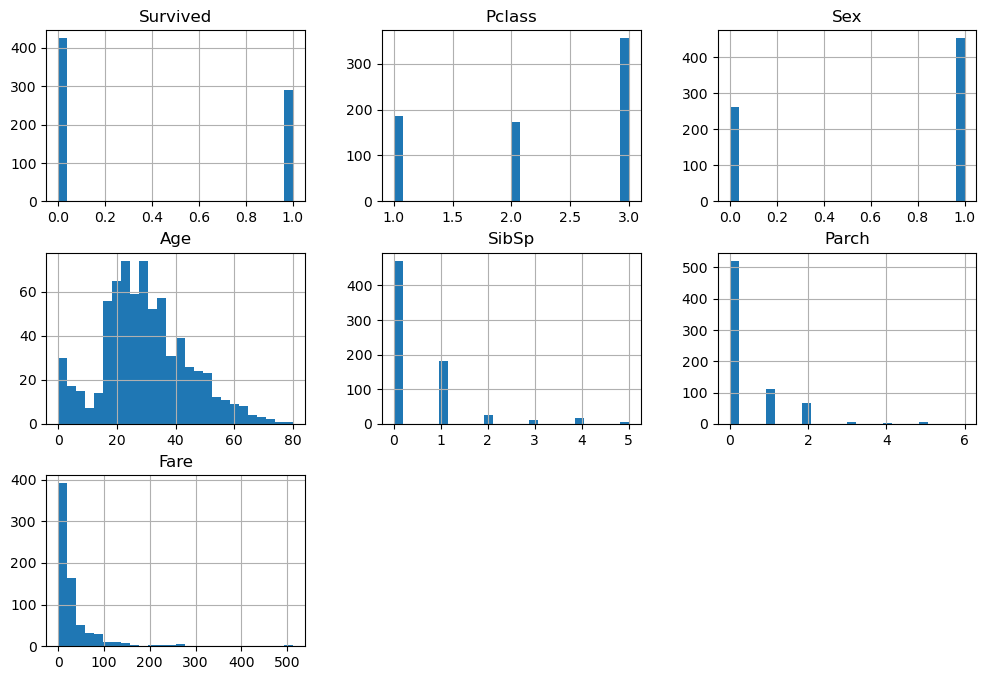

In [6]:
df.hist(bins=int(np.sqrt(714)), figsize=(12,8))

In [7]:
y=df.iloc[:,0]
x=df.iloc[:,1:]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)


In [8]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
predict = model.predict(x_test)

In [10]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        85
           1       0.75      0.66      0.70        58

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143



In [11]:
with open("trained_model.pkl", 'wb') as file:
    pickle.dump(model,file)